In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [3]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [13]:
x, y = mnist['data'].values, mnist['target'].values

In [14]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
x.shape

(70000, 784)

In [16]:
y.shape

(70000,)

In [17]:
%matplotlib inline

In [22]:
digit = x[16000]
digit_image = digit.reshape(28, 28) #reshape to plot

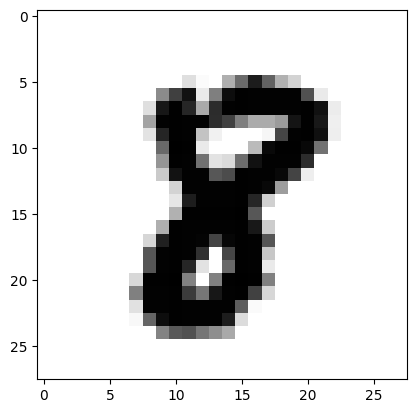

In [25]:
plt.imshow(digit_image, cmap=plt.cm.binary, interpolation="nearest")

In [27]:
y[16000]

'8'

In [31]:
# X_train, X_test = x[0:60000], x[60000:]
# y_train, y_test = y[0:60000], y[60000:]
# shuffle_index = np.random.permutation(60000)
# X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=10000, random_state=42, shuffle=True)

In [33]:
len(X_train)

60000

In [34]:
len(X_test)

10000

In [37]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  64,  64,   0,   0,
       128, 191, 255, 255, 191,  64,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 191, 25

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
X_train[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.41807799e-03, -5.75481961e-03, -4.08251693e-03, -4.08251693e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.08251693e-03, -6.22758214e-03, -8.32576704e-03, -1.09072555e-02,
       -1.46991218e-02, -1.98735613e-02, -2.48710687e-02, -2.97158649e-02,
       -3.14631998e-02, -3.28191669e-02, -3.32981772e-02, -2.99583222e-02,
       -2.94154579e-02, -2.76427882e-02, -2.33132424e-02, -1.83972082e-02,
       -1.64294965e-02, -1.02357598e-02, -7.38446185e-03, -4.08251693e-03,
        0.00000000e+00,  

In [63]:
print(type(y_train))
print(type(X_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [64]:
np.unique(y_train)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [65]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)

In [78]:
y_test = encoder.transform(y_test)

In [42]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [76]:
model = Sequential([
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=10, activation='linear')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=60)

Epoch 1/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 386us/step - accuracy: 0.8031 - loss: 0.6365
Epoch 2/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 379us/step - accuracy: 0.9490 - loss: 0.1702
Epoch 3/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 378us/step - accuracy: 0.9605 - loss: 0.1300
Epoch 4/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 382us/step - accuracy: 0.9659 - loss: 0.1118
Epoch 5/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 378us/step - accuracy: 0.9715 - loss: 0.0923
Epoch 6/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 380us/step - accuracy: 0.9728 - loss: 0.0875
Epoch 7/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 387us/step - accuracy: 0.9760 - loss: 0.0774
Epoch 8/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 399us/step - accuracy: 0.9786 - loss: 0.0690
Epoch 9/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 387us/step - accuracy: 0.9803 - loss: 0.0621
Epoch 10/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 383us/step - accuracy: 0.9808 - loss: 0.0587
Epoch 11/60
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 382us/step - accuracy: 0.9830 - loss: 0.0527
Epoch 12

In [79]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.9524 - loss: 0.6749


[0.7215431332588196, 0.9502999782562256]

In [80]:
y_predicted = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step


In [81]:
np.argmax(y_predicted[0])

8

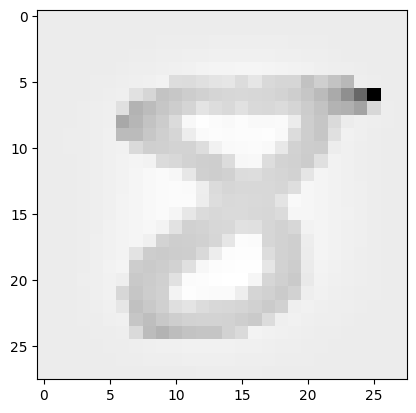

In [83]:
digit = X_test[0]
digit_image = digit.reshape(28, 28)
plt.imshow(digit_image, cmap=plt.cm.binary, interpolation="nearest")

In [84]:
y_predicted[:5]

array([[-6.18491096e+01, -3.51643715e+01, -2.74612751e+01,
        -2.26520252e+01, -4.84081078e+01, -1.38835535e+01,
        -3.75078850e+01, -4.95865822e+01,  4.24381905e+01,
        -5.60898972e+01],
       [-6.05099106e+01, -2.55946007e+01, -2.99437428e+00,
        -4.09373474e+01,  4.54209137e+01, -4.82932129e+01,
        -3.34832497e+01,  1.83325195e+01, -2.34574451e+01,
         3.00083351e+00],
       [-9.10071087e+00, -1.61563911e+01, -1.40983353e+01,
        -6.52585220e+00, -7.31758690e+00,  1.34342015e-02,
        -3.77568960e-01, -1.43960505e+01,  1.41775429e+00,
        -7.81689548e+00],
       [-7.35759306e+00, -2.32671738e+00,  1.13341885e+01,
        -2.24158788e+00, -3.92389069e+01, -3.20399132e+01,
        -7.60201492e+01,  2.56235161e+01, -2.12069359e+01,
        -7.26769924e+00],
       [-2.53622437e+01, -1.79676759e+00, -2.24622917e+01,
        -2.31487598e+01, -2.02664165e+01, -1.80278721e+01,
        -5.99936981e+01,  1.83960075e+01, -1.76657772e+01,
         1.

In [85]:
y_test[:5]

array([8, 4, 8, 7, 7])

In [87]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[8, 4, 8, 7, 7]

In [88]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 950,    0,    5,    0,    0,    7,   13,    3,    4,    1],
       [   0, 1135,    3,    2,    1,    2,    1,    2,    5,    1],
       [   4,    8,  911,   10,    5,    3,    3,    7,   15,    1],
       [   1,    3,   10,  974,    1,   21,    0,   11,    7,    6],
       [   2,    3,    9,    1,  856,    3,    7,    2,    5,   18],
       [   6,    0,    1,   20,    2,  888,   10,    1,    7,    2],
       [   3,    3,    2,    0,    5,    6,  940,    0,    2,    0],
       [   1,    6,    9,    1,    6,    2,    0, 1007,    4,   19],
       [   4,    9,    6,   22,    6,   16,    7,    9,  880,   10],
       [   7,    3,    2,    4,   17,    7,    0,   21,   13,  962]],
      dtype=int32)>

In [89]:
from sklearn import metrics
expected = y_test
predicted_labels = y_predicted_labels
print(metrics.classification_report(expected, predicted_labels))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       983
           1       0.97      0.99      0.98      1152
           2       0.95      0.94      0.95       967
           3       0.94      0.94      0.94      1034
           4       0.95      0.94      0.95       906
           5       0.93      0.95      0.94       937
           6       0.96      0.98      0.97       961
           7       0.95      0.95      0.95      1055
           8       0.93      0.91      0.92       969
           9       0.94      0.93      0.94      1036

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

